<a href="https://colab.research.google.com/github/riyaz7781/Excel-R-assignments/blob/main/Naive_Bayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import the Necesaary Libraries

In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import GaussianNB
import warnings
warnings.filterwarnings("ignore")

Load the Dataset

In [64]:
data1=pd.read_csv("/content/SalaryData_Train.csv")
data1.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


Drop the duplicates

In [65]:
data2=data1.drop_duplicates()
data2.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


EDA

In [66]:
data2.isna().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

Label Encoding the Categorical features

In [67]:
label=LabelEncoder()
data2["workclass"]=label.fit_transform(data2["workclass"])
data2["education"]=label.fit_transform(data2["education"])
data2["maritalstatus"]=label.fit_transform(data2["maritalstatus"])
data2["occupation"]=label.fit_transform(data2["occupation"])
data2["relationship"]=label.fit_transform(data2["relationship"])
data2["race"]=label.fit_transform(data2["race"])
data2["sex"]=label.fit_transform(data2["sex"])
data2["native"]=label.fit_transform(data2["native"])
data2["Salary"]=label.fit_transform(data2["Salary"])
data2.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,5,9,13,4,0,1,4,1,2174,0,40,37,0
1,50,4,9,13,2,3,0,4,1,0,0,13,37,0
2,38,2,11,9,0,5,1,4,1,0,0,40,37,0
3,53,2,1,7,2,5,0,2,1,0,0,40,37,0
4,28,2,9,13,2,9,5,2,0,0,0,40,4,0


Distribution plot for HoursPerWeek

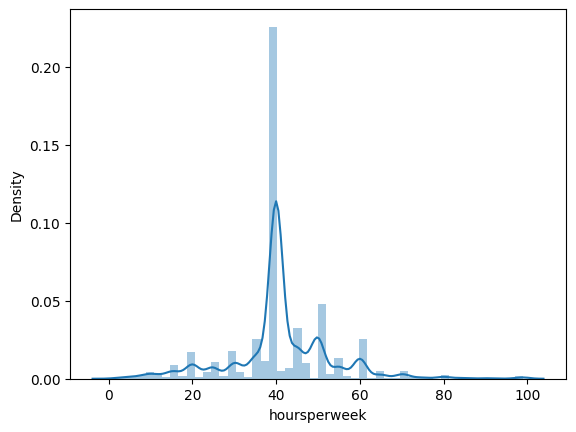

In [68]:
sns.distplot(data2["hoursperweek"])
plt.show()

Load the other Dataset

In [69]:
test1=pd.read_csv("/content/SalaryData_Test.csv")
test1.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K


Label Encoding the Categorical Features

In [70]:
label=LabelEncoder()
test1["workclass"]=label.fit_transform(test1["workclass"])
test1["education"]=label.fit_transform(test1["education"])
test1["maritalstatus"]=label.fit_transform(test1["maritalstatus"])
test1["occupation"]=label.fit_transform(test1["occupation"])
test1["relationship"]=label.fit_transform(test1["relationship"])
test1["race"]=label.fit_transform(test1["race"])
test1["sex"]=label.fit_transform(test1["sex"])
test1["native"]=label.fit_transform(test1["native"])
test1["Salary"]=label.fit_transform(test1["Salary"])
test1.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,2,1,7,4,6,3,2,1,0,0,40,37,0
1,38,2,11,9,2,4,0,4,1,0,0,50,37,0
2,28,1,7,12,2,10,0,4,1,0,0,40,37,1
3,44,2,15,10,2,6,0,2,1,7688,0,40,37,1
4,34,2,0,6,4,7,1,4,1,0,0,30,37,0


EDA

In [71]:
test1.isna().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

Distribution Plot

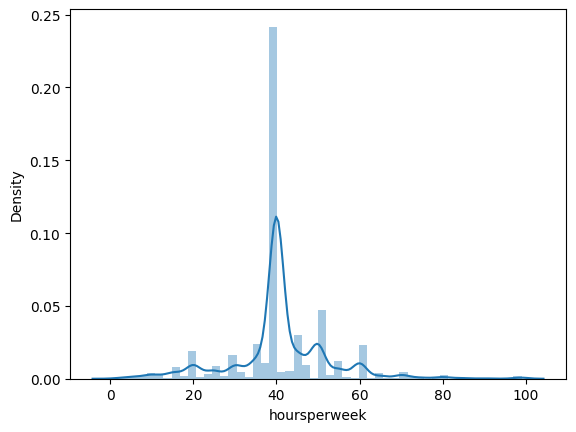

In [72]:
sns.distplot(test1["hoursperweek"])
plt.show()

Independent and Dependent features for Train Dataset

In [73]:
x_train=data2.iloc[:,0:13]
y_train=data2.iloc[:,-1]

Independent and Dependent features for Test Dataset

In [74]:
x_test=test1.iloc[:,0:13]
y_test=test1.iloc[:,-1]

## **Model Building**

1.Gaussian Naive Bayes

In [75]:
model1=GaussianNB()
model1.fit(x_train,y_train)

GaussianNB()

Predicting the values in test dataset

In [76]:
y_pred=model1.predict(x_train)
np.mean(y_train==y_pred)

0.7933687692822362

2.MultiNomial Naive Bayes

In [77]:
from sklearn.naive_bayes import MultinomialNB
model2=MultinomialNB()
model2.fit(x_train,y_train)

MultinomialNB()

Predicting the accuracy

In [78]:
y_pred2=model2.predict(x_train)
np.mean(y_pred==y_train)

0.7933687692822362

We observe that after applying Gaussain NB model we get 79.33% accuracy